In [3]:
import math
import copy
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.special import expit as sigmoid

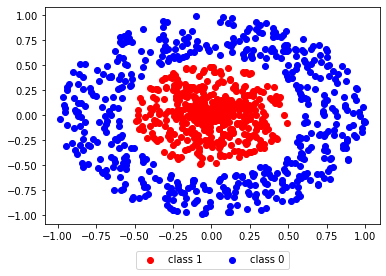

In [4]:
np.random.seed(0)

def generate_dataset(N_points):
    # 1 class
    radiuses = np.random.uniform(0, 0.5, size=N_points//2)
    angles = np.random.uniform(0, 2*math.pi, size=N_points//2)
    
    x_1 = np.multiply(radiuses, np.cos(angles)).reshape(N_points//2, 1)
    x_2 = np.multiply(radiuses, np.sin(angles)).reshape(N_points//2, 1)
    X_class_1 = np.concatenate((x_1, x_2), axis=1)
    Y_class_1 = np.full((N_points//2,), 1)
        
    # 0 class
    radiuses = np.random.uniform(0.6, 1, size=N_points//2)
    angles = np.random.uniform(0, 2*math.pi, size=N_points//2)
    
    x_1 = np.multiply(radiuses, np.cos(angles)).reshape(N_points//2, 1)
    x_2 = np.multiply(radiuses, np.sin(angles)).reshape(N_points//2, 1)
    X_class_0 = np.concatenate((x_1, x_2), axis=1)
    Y_class_0 = np.full((N_points//2,), 0)
        
    X = np.concatenate((X_class_1, X_class_0), axis=0)
    Y = np.concatenate((Y_class_1, Y_class_0), axis=0)
    return X, Y
    
N_points = 1000
X, Y = generate_dataset(N_points)

plt.scatter(X[:N_points//2, 0], X[:N_points//2, 1], color='red', label='class 1') 
plt.scatter(X[N_points//2:, 0], X[N_points//2:, 1], color='blue', label='class 0')
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1), ncol=2)
plt.show()

# Forward propogation

In [5]:
def SigmoidDerivative(x):
    return np.multiply(x, 1-x)

# Derivatie of e^x/ 1+ e^x


# Activation - Sigmodi - 1 /(1+e-x)

# 


In [13]:
weights = {
    'W1': np.random.randn(3, 2),
    'b1': np.zeros(3),
    'W2': np.random.randn(3),
    'b2': 0,
}

In [14]:
weights

{'W1': array([[-1.13359283,  0.99675964],
        [-0.14876615,  0.0960042 ],
        [-0.0451133 ,  0.07912172]]),
 'W2': array([ 0.85053068, -0.83912419, -1.01177408]),
 'b1': array([0., 0., 0.]),
 'b2': 0}

In [17]:
def forward_propagation(X, weights):    
    # this implement the vectorized equations defined above.
    Z1 = np.dot(X, weights['W1'].T)  + weights['b1']  # W1X1 + B 
    H = sigmoid(Z1)  
    
    
    Z2 = np.dot(H, weights['W2'].T) + weights['b2']
    Y = sigmoid(Z2)    
    
    
    return Y, Z2, H, Z1





#X1W1 + X2 W2 + X3W3 + .. + B

In [18]:
def back_propagation(X, Y_T, weights):
    
    
    N_points = X.shape[0]
    
    # forward propagation
    Y, Z2, H, Z1 = forward_propagation(X, weights)
    
    
    
    L = (1/N_points) * np.sum(-Y_T * np.log(Y) - (1 - Y_T) * np.log(1 - Y))  # LOSSS FUNCTION # CLASSIFICATION PROBLEM 
    
    
    
    # back propagation
    
    
    dLdY = 1/N_points * np.divide(Y - Y_T, np.multiply(Y, 1-Y))
    dLdZ2 = np.multiply(dLdY, (sigmoid(Z2)*(1-sigmoid(Z2))))
    dLdW2 = np.dot(H.T, dLdZ2)
    dLdb2 = np.dot(dLdZ2.T, np.ones(N_points))
    dLdH = np.dot(dLdZ2.reshape(N_points, 1), weights['W2'].reshape(1, 3))
    dLdZ1 = np.multiply(dLdH, np.multiply(sigmoid(Z1), (1-sigmoid(Z1))))
    dLdW1 = np.dot(dLdZ1.T, X)
    dLdb1 = np.dot(dLdZ1.T, np.ones(N_points))
    
    ## W1, W2 , b1 , b2 , Z1 , Z2
    
    
    gradients = {
        'W1': dLdW1,
        'b1': dLdb1,
        'W2': dLdW2, ## derivative of L with respect to Weight 2 
        'b2': dLdb2,
    }
    return gradients, L
    
    
    # we only update Weights and biases and Back Propoagtion help me with that gradeint vector

### Training: gradient descent


{'W1': array([[-1.13391968,  0.99701095],
       [-0.14835627,  0.09552259],
       [-0.04461822,  0.07853842]]), 'b1': array([0., 0., 0.]), 'W2': array([ 0.85053068, -0.83912419, -1.01177408]), 'b2': 0}
{'W1': array([[-1.13391968,  0.99701095],
       [-0.14835627,  0.09552259],
       [-0.04461822,  0.07853842]]), 'b1': array([ 0.03082382, -0.02597848, -0.03125455]), 'W2': array([ 0.85053068, -0.83912419, -1.01177408]), 'b2': 0}
{'W1': array([[-1.13391968,  0.99701095],
       [-0.14835627,  0.09552259],
       [-0.04461822,  0.07853842]]), 'b1': array([ 0.03082382, -0.02597848, -0.03125455]), 'W2': array([ 0.91324812, -0.77726388, -0.94997417]), 'b2': 0}
{'W1': array([[-1.13391968,  0.99701095],
       [-0.14835627,  0.09552259],
       [-0.04461822,  0.07853842]]), 'b1': array([ 0.03082382, -0.02597848, -0.03125455]), 'W2': array([ 0.91324812, -0.77726388, -0.94997417]), 'b2': 0.12346426050957522}
{'W1': array([[-1.13443187,  0.99726345],
       [-0.14798567,  0.09519698],
       [

       [-0.02895472,  0.07693772]]), 'b1': array([ 0.72999307, -0.02934766, -0.02805233]), 'W2': array([ 1.19290265, -0.78639463, -0.96090695]), 'b2': 0.09885631610243296}
{'W1': array([[-1.38225085,  1.18132407],
       [-0.13849916,  0.09489517],
       [-0.02925878,  0.07731118]]), 'b1': array([ 0.72999307, -0.02934766, -0.02805233]), 'W2': array([ 1.19290265, -0.78639463, -0.96090695]), 'b2': 0.09885631610243296}
{'W1': array([[-1.38225085,  1.18132407],
       [-0.13849916,  0.09489517],
       [-0.02925878,  0.07731118]]), 'b1': array([ 0.73789996, -0.02890293, -0.02742217]), 'W2': array([ 1.19290265, -0.78639463, -0.96090695]), 'b2': 0.09885631610243296}
{'W1': array([[-1.38225085,  1.18132407],
       [-0.13849916,  0.09489517],
       [-0.02925878,  0.07731118]]), 'b1': array([ 0.73789996, -0.02890293, -0.02742217]), 'W2': array([ 1.19704421, -0.7878257 , -0.96229589]), 'b2': 0.09885631610243296}
{'W1': array([[-1.38225085,  1.18132407],
       [-0.13849916,  0.09489517],
    

{'W1': array([[-1.90784817,  1.61253155],
       [-0.20453257,  0.15809022],
       [-0.10758531,  0.15200471]]), 'b1': array([1.32042227, 0.01468923, 0.03301716]), 'W2': array([ 1.63334558, -0.9361011 , -1.10263657]), 'b2': -0.1586929073787469}
{'W1': array([[-1.90784817,  1.61253155],
       [-0.20453257,  0.15809022],
       [-0.10758531,  0.15200471]]), 'b1': array([1.32788245, 0.01536717, 0.03395449]), 'W2': array([ 1.63334558, -0.9361011 , -1.10263657]), 'b2': -0.1586929073787469}
{'W1': array([[-1.90784817,  1.61253155],
       [-0.20453257,  0.15809022],
       [-0.10758531,  0.15200471]]), 'b1': array([1.32788245, 0.01536717, 0.03395449]), 'W2': array([ 1.64087083, -0.93870401, -1.10507919]), 'b2': -0.1586929073787469}
{'W1': array([[-1.90784817,  1.61253155],
       [-0.20453257,  0.15809022],
       [-0.10758531,  0.15200471]]), 'b1': array([1.32788245, 0.01536717, 0.03395449]), 'W2': array([ 1.64087083, -0.93870401, -1.10507919]), 'b2': -0.16267772682266893}
{'W1': array([[

{'W1': array([[-2.76263178,  2.34863661],
       [-0.43567796,  0.37212634],
       [-0.37151876,  0.39016315]]), 'b1': array([1.91501258, 0.05457969, 0.0923783 ]), 'W2': array([ 2.42696114, -1.24443973, -1.3964951 ]), 'b2': -0.5297169152364951}
{'W1': array([[-2.76263178,  2.34863661],
       [-0.43567796,  0.37212634],
       [-0.37151876,  0.39016315]]), 'b1': array([1.92129137, 0.05447766, 0.09239136]), 'W2': array([ 2.42696114, -1.24443973, -1.3964951 ]), 'b2': -0.5297169152364951}
{'W1': array([[-2.76263178,  2.34863661],
       [-0.43567796,  0.37212634],
       [-0.37151876,  0.39016315]]), 'b1': array([1.92129137, 0.05447766, 0.09239136]), 'W2': array([ 2.43769992, -1.24923347, -1.40114165]), 'b2': -0.5297169152364951}
{'W1': array([[-2.76263178,  2.34863661],
       [-0.43567796,  0.37212634],
       [-0.37151876,  0.39016315]]), 'b1': array([1.92129137, 0.05447766, 0.09239136]), 'W2': array([ 2.43769992, -1.24923347, -1.40114165]), 'b2': -0.5342032310758118}
{'W1': array([[-

       [-0.80677983,  0.80601318]]), 'b1': array([ 2.36686279, -0.07797505, -0.05188116]), 'W2': array([ 3.43321735, -1.78394554, -1.92719942]), 'b2': -0.9427347977434823}
{'W1': array([[-3.66333466,  3.19810504],
       [-0.84261759,  0.76725058],
       [-0.80677983,  0.80601318]]), 'b1': array([ 2.37077792, -0.08134124, -0.05566486]), 'W2': array([ 3.43321735, -1.78394554, -1.92719942]), 'b2': -0.9427347977434823}
{'W1': array([[-3.66333466,  3.19810504],
       [-0.84261759,  0.76725058],
       [-0.80677983,  0.80601318]]), 'b1': array([ 2.37077792, -0.08134124, -0.05566486]), 'W2': array([ 3.44560111, -1.79171242, -1.93492502]), 'b2': -0.9427347977434823}
{'W1': array([[-3.66333466,  3.19810504],
       [-0.84261759,  0.76725058],
       [-0.80677983,  0.80601318]]), 'b1': array([ 2.37077792, -0.08134124, -0.05566486]), 'W2': array([ 3.44560111, -1.79171242, -1.93492502]), 'b2': -0.9482267693393114}
{'W1': array([[-3.67335279,  3.20822708],
       [-0.84808142,  0.77279049],
    

{'W1': array([[-4.41645316,  4.02602749],
       [-1.32471479,  1.29008106],
       [-1.30700023,  1.37737948]]), 'b1': array([ 2.57534166, -0.4868892 , -0.51034727]), 'W2': array([ 4.46155916, -2.49850833, -2.64934164]), 'b2': -1.5042368992115347}
{'W1': array([[-4.41645316,  4.02602749],
       [-1.32471479,  1.29008106],
       [-1.30700023,  1.37737948]]), 'b1': array([ 2.57663489, -0.4926582 , -0.51675639]), 'W2': array([ 4.46155916, -2.49850833, -2.64934164]), 'b2': -1.5042368992115347}
{'W1': array([[-4.41645316,  4.02602749],
       [-1.32471479,  1.29008106],
       [-1.30700023,  1.37737948]]), 'b1': array([ 2.57663489, -0.4926582 , -0.51675639]), 'W2': array([ 4.47314813, -2.50711604, -2.65820481]), 'b2': -1.5042368992115347}
{'W1': array([[-4.41645316,  4.02602749],
       [-1.32471479,  1.29008106],
       [-1.30700023,  1.37737948]]), 'b1': array([ 2.57663489, -0.4926582 , -0.51675639]), 'W2': array([ 4.47314813, -2.50711604, -2.65820481]), 'b2': -1.5119294124995657}
{'W1

{'W1': array([[-4.84017247,  4.59810963],
       [-1.70784199,  1.74529145],
       [-1.66141808,  1.94320686]]), 'b1': array([ 2.64571245, -0.88228745, -0.94358321]), 'W2': array([ 5.20843928, -3.05747239, -3.23473111]), 'b2': -2.0510195749774636}
{'W1': array([[-4.84017247,  4.59810963],
       [-1.70784199,  1.74529145],
       [-1.66141808,  1.94320686]]), 'b1': array([ 2.64571245, -0.88228745, -0.94358321]), 'W2': array([ 5.21739012, -3.06413874, -3.24184551]), 'b2': -2.0510195749774636}
{'W1': array([[-4.84017247,  4.59810963],
       [-1.70784199,  1.74529145],
       [-1.66141808,  1.94320686]]), 'b1': array([ 2.64571245, -0.88228745, -0.94358321]), 'W2': array([ 5.21739012, -3.06413874, -3.24184551]), 'b2': -2.058114705693784}
{'W1': array([[-4.8444163 ,  4.60472315],
       [-1.71265908,  1.75081444],
       [-1.66501394,  1.95097903]]), 'b1': array([ 2.64571245, -0.88228745, -0.94358321]), 'W2': array([ 5.21739012, -3.06413874, -3.24184551]), 'b2': -2.058114705693784}
{'W1':

{'W1': array([[-5.05991887,  5.0151741 ],
       [-2.08110274,  2.03707035],
       [-1.77540494,  2.5478293 ]]), 'b1': array([ 2.72133577, -1.18467881, -1.27926337]), 'W2': array([ 5.78530127, -3.48458747, -3.70101583]), 'b2': -2.540007247748435}
{'W1': array([[-5.05991887,  5.0151741 ],
       [-2.08110274,  2.03707035],
       [-1.77540494,  2.5478293 ]]), 'b1': array([ 2.72247603, -1.18789221, -1.28305644]), 'W2': array([ 5.78530127, -3.48458747, -3.70101583]), 'b2': -2.540007247748435}
{'W1': array([[-5.05991887,  5.0151741 ],
       [-2.08110274,  2.03707035],
       [-1.77540494,  2.5478293 ]]), 'b1': array([ 2.72247603, -1.18789221, -1.28305644]), 'W2': array([ 5.79119643, -3.48901379, -3.70601634]), 'b2': -2.540007247748435}
{'W1': array([[-5.05991887,  5.0151741 ],
       [-2.08110274,  2.03707035],
       [-1.77540494,  2.5478293 ]]), 'b1': array([ 2.72247603, -1.18789221, -1.28305644]), 'W2': array([ 5.79119643, -3.48901379, -3.70601634]), 'b2': -2.545473249160316}
{'W1': a

{'W1': array([[-5.1146669 ,  5.30153191],
       [-2.85203599,  1.7093793 ],
       [-1.22132833,  3.45565841]]), 'b1': array([ 2.84781989, -1.44088502, -1.61913932]), 'W2': array([ 6.18467948, -3.85894889, -4.13534684]), 'b2': -2.94090839179303}
{'W1': array([[-5.1146669 ,  5.30153191],
       [-2.85203599,  1.7093793 ],
       [-1.22132833,  3.45565841]]), 'b1': array([ 2.84990688, -1.444348  , -1.6239615 ]), 'W2': array([ 6.18467948, -3.85894889, -4.13534684]), 'b2': -2.94090839179303}
{'W1': array([[-5.1146669 ,  5.30153191],
       [-2.85203599,  1.7093793 ],
       [-1.22132833,  3.45565841]]), 'b1': array([ 2.84990688, -1.444348  , -1.6239615 ]), 'W2': array([ 6.18854982, -3.86476316, -4.14192729]), 'b2': -2.94090839179303}
{'W1': array([[-5.1146669 ,  5.30153191],
       [-2.85203599,  1.7093793 ],
       [-1.22132833,  3.45565841]]), 'b1': array([ 2.84990688, -1.444348  , -1.6239615 ]), 'W2': array([ 6.18854982, -3.86476316, -4.14192729]), 'b2': -2.9447317921644443}
{'W1': arr

{'W1': array([[-5.09316333,  5.48966037],
       [-4.31850062,  0.30405162],
       [ 0.25464559,  4.7063047 ]]), 'b1': array([ 3.09288604, -1.86755235, -2.10109985]), 'W2': array([ 6.54934895, -4.73127776, -5.01629707]), 'b2': -3.1276352075180336}
{'W1': array([[-5.09316333,  5.48966037],
       [-4.31850062,  0.30405162],
       [ 0.25464559,  4.7063047 ]]), 'b1': array([ 3.09634628, -1.87393316, -2.10702038]), 'W2': array([ 6.54934895, -4.73127776, -5.01629707]), 'b2': -3.1276352075180336}
{'W1': array([[-5.09316333,  5.48966037],
       [-4.31850062,  0.30405162],
       [ 0.25464559,  4.7063047 ]]), 'b1': array([ 3.09634628, -1.87393316, -2.10702038]), 'W2': array([ 6.55486562, -4.74635532, -5.03065862]), 'b2': -3.1276352075180336}
{'W1': array([[-5.09316333,  5.48966037],
       [-4.31850062,  0.30405162],
       [ 0.25464559,  4.7063047 ]]), 'b1': array([ 3.09634628, -1.87393316, -2.10702038]), 'W2': array([ 6.55486562, -4.74635532, -5.03065862]), 'b2': -3.1283357499345947}
{'W1

       [ 1.39696358,  5.58800121]]), 'b1': array([ 3.31890622, -2.30969863, -2.47660812]), 'W2': array([ 7.06124824, -5.97824576, -6.19205181]), 'b2': -3.1398068724515826}
{'W1': array([[-5.17726588,  5.6492474 ],
       [-5.41603767, -0.80800355],
       [ 1.39696358,  5.58800121]]), 'b1': array([ 3.32077281, -2.31375522, -2.47985627]), 'W2': array([ 7.06124824, -5.97824576, -6.19205181]), 'b2': -3.1398068724515826}
{'W1': array([[-5.17726588,  5.6492474 ],
       [-5.41603767, -0.80800355],
       [ 1.39696358,  5.58800121]]), 'b1': array([ 3.32077281, -2.31375522, -2.47985627]), 'W2': array([ 7.06768678, -5.99193343, -6.20496224]), 'b2': -3.1398068724515826}
{'W1': array([[-5.17726588,  5.6492474 ],
       [-5.41603767, -0.80800355],
       [ 1.39696358,  5.58800121]]), 'b1': array([ 3.32077281, -2.31375522, -2.47985627]), 'W2': array([ 7.06768678, -5.99193343, -6.20496224]), 'b2': -3.1398008202386696}
{'W1': array([[-5.17886466,  5.65123592],
       [-5.42605658, -0.81678466],
    

       [ 1.9579274 ,  6.14921305]]), 'b1': array([ 3.42755579, -2.57826141, -2.69144036]), 'W2': array([ 7.58762599, -6.97798186, -7.13967358]), 'b2': -3.15421977399191}
{'W1': array([[-5.32353383,  5.81730044],
       [-6.0892153 , -1.29799947],
       [ 1.9579274 ,  6.14921305]]), 'b1': array([ 3.42755579, -2.57826141, -2.69144036]), 'W2': array([ 7.58762599, -6.97798186, -7.13967358]), 'b2': -3.1546034622387444}
{'W1': array([[-5.32534287,  5.81931433],
       [-6.09577862, -1.30168032],
       [ 1.96249924,  6.15480079]]), 'b1': array([ 3.42755579, -2.57826141, -2.69144036]), 'W2': array([ 7.58762599, -6.97798186, -7.13967358]), 'b2': -3.1546034622387444}
{'W1': array([[-5.32534287,  5.81931433],
       [-6.09577862, -1.30168032],
       [ 1.96249924,  6.15480079]]), 'b1': array([ 3.42841962, -2.58078842, -2.69348689]), 'W2': array([ 7.58762599, -6.97798186, -7.13967358]), 'b2': -3.1546034622387444}
{'W1': array([[-5.32534287,  5.81931433],
       [-6.09577862, -1.30168032],
      

       [ 2.23825467,  6.55171649]]), 'b1': array([ 3.48213137, -2.75684871, -2.83852369]), 'W2': array([ 8.06159827, -7.72849766, -7.8571238 ]), 'b2': -3.201090269707703}
{'W1': array([[-5.46862435,  5.97951101],
       [-6.55582243, -1.50515177],
       [ 2.23825467,  6.55171649]]), 'b1': array([ 3.48213137, -2.75684871, -2.83852369]), 'W2': array([ 8.06700927, -7.73647761, -7.86477506]), 'b2': -3.201090269707703}
{'W1': array([[-5.46862435,  5.97951101],
       [-6.55582243, -1.50515177],
       [ 2.23825467,  6.55171649]]), 'b1': array([ 3.48213137, -2.75684871, -2.83852369]), 'W2': array([ 8.06700927, -7.73647761, -7.86477506]), 'b2': -3.2017944911543186}
{'W1': array([[-5.470238  ,  5.98133579],
       [-6.56051555, -1.5066927 ],
       [ 2.24064038,  6.55581212]]), 'b1': array([ 3.48213137, -2.75684871, -2.83852369]), 'W2': array([ 8.06700927, -7.73647761, -7.86477506]), 'b2': -3.2017944911543186}
{'W1': array([[-5.470238  ,  5.98133579],
       [-6.56051555, -1.5066927 ],
      

{'W1': array([[-5.58737521,  6.11614676],
       [-6.88472841, -1.58981792],
       [ 2.38854959,  6.84012889]]), 'b1': array([ 3.51491425, -2.88036391, -2.94310347]), 'W2': array([ 8.47376185, -8.30692242, -8.41263496]), 'b2': -3.263912840685928}
{'W1': array([[-5.58737521,  6.11614676],
       [-6.88472841, -1.58981792],
       [ 2.38854959,  6.84012889]]), 'b1': array([ 3.51526791, -2.8817236 , -2.94426525]), 'W2': array([ 8.47376185, -8.30692242, -8.41263496]), 'b2': -3.263912840685928}
{'W1': array([[-5.58737521,  6.11614676],
       [-6.88472841, -1.58981792],
       [ 2.38854959,  6.84012889]]), 'b1': array([ 3.51526791, -2.8817236 , -2.94426525]), 'W2': array([ 8.47866271, -8.31347937, -8.41894102]), 'b2': -3.263912840685928}
{'W1': array([[-5.58737521,  6.11614676],
       [-6.88472841, -1.58981792],
       [ 2.38854959,  6.84012889]]), 'b1': array([ 3.51526791, -2.8817236 , -2.94426525]), 'W2': array([ 8.47866271, -8.31347937, -8.41894102]), 'b2': -3.264758521469074}
{'W1': a

{'W1': array([[-5.68732743,  6.23667218],
       [-7.14644871, -1.62745627],
       [ 2.49005092,  7.07024056]]), 'b1': array([ 3.5406354 , -2.97838609, -3.02726129]), 'W2': array([ 8.85739704, -8.80162968, -8.88878368]), 'b2': -3.3353114299925335}
{'W1': array([[-5.68732743,  6.23667218],
       [-7.14644871, -1.62745627],
       [ 2.49005092,  7.07024056]]), 'b1': array([ 3.54091433, -2.97942988, -3.02816081]), 'W2': array([ 8.85739704, -8.80162968, -8.88878368]), 'b2': -3.3353114299925335}
{'W1': array([[-5.68732743,  6.23667218],
       [-7.14644871, -1.62745627],
       [ 2.49005092,  7.07024056]]), 'b1': array([ 3.54091433, -2.97942988, -3.02816081]), 'W2': array([ 8.86186169, -8.80718536, -8.89413437]), 'b2': -3.3353114299925335}
{'W1': array([[-5.68732743,  6.23667218],
       [-7.14644871, -1.62745627],
       [ 2.49005092,  7.07024056]]), 'b1': array([ 3.54091433, -2.97942988, -3.02816081]), 'W2': array([ 8.86186169, -8.80718536, -8.89413437]), 'b2': -3.3361944519173075}
{'W1

{'W1': array([[-5.76991273,  6.3429181 ],
       [-7.36179498, -1.64221302],
       [ 2.56836479,  7.25849276]]), 'b1': array([ 3.56198362, -3.05643413, -3.09459479]), 'W2': array([ 9.22072806, -9.24101416, -9.31210168]), 'b2': -3.409769200241234}
{'W1': array([[-5.76991273,  6.3429181 ],
       [-7.36179498, -1.64221302],
       [ 2.56836479,  7.25849276]]), 'b1': array([ 3.56220844, -3.05723559, -3.09528635]), 'W2': array([ 9.22072806, -9.24101416, -9.31210168]), 'b2': -3.409769200241234}
{'W1': array([[-5.76991273,  6.3429181 ],
       [-7.36179498, -1.64221302],
       [ 2.56836479,  7.25849276]]), 'b1': array([ 3.56220844, -3.05723559, -3.09528635]), 'W2': array([ 9.22482003, -9.24582732, -9.31674011]), 'b2': -3.409769200241234}
{'W1': array([[-5.76991273,  6.3429181 ],
       [-7.36179498, -1.64221302],
       [ 2.56836479,  7.25849276]]), 'b1': array([ 3.56220844, -3.05723559, -3.09528635]), 'W2': array([ 9.22482003, -9.24582732, -9.31674011]), 'b2': -3.410631161402869}
{'W1': a

{'W1': array([[-5.83369846,  6.43216712],
       [-7.53384719, -1.64455911],
       [ 2.63152421,  7.40728366]]), 'b1': array([ 3.57894467, -3.11588535, -3.1458317 ]), 'W2': array([ 9.55140246, -9.62160771, -9.67892841]), 'b2': -3.480315508377265}
{'W1': array([[-5.83369846,  6.43216712],
       [-7.53384719, -1.64455911],
       [ 2.63152421,  7.40728366]]), 'b1': array([ 3.57912398, -3.11650521, -3.1463649 ]), 'W2': array([ 9.55140246, -9.62160771, -9.67892841]), 'b2': -3.480315508377265}
{'W1': array([[-5.83369846,  6.43216712],
       [-7.53384719, -1.64455911],
       [ 2.63152421,  7.40728366]]), 'b1': array([ 3.57912398, -3.11650521, -3.1463649 ]), 'W2': array([ 9.55518926, -9.62587473, -9.68304151]), 'b2': -3.480315508377265}
{'W1': array([[-5.83369846,  6.43216712],
       [-7.53384719, -1.64455911],
       [ 2.63152421,  7.40728366]]), 'b1': array([ 3.57912398, -3.11650521, -3.1463649 ]), 'W2': array([ 9.55518926, -9.62587473, -9.68304151]), 'b2': -3.4811300591533962}
{'W1': 

       [ 2.68614337,  7.52789326]]), 'b1': array([ 3.59240212, -3.1623514 , -3.18570456]), 'W2': array([  9.86209258,  -9.96567338, -10.01060003]), 'b2': -3.5464172764362987}
{'W1': array([[-5.88278691,  6.50842973],
       [-7.67521416, -1.63997106],
       [ 2.68614337,  7.52789326]]), 'b1': array([ 3.59240212, -3.1623514 , -3.18570456]), 'W2': array([  9.86209258,  -9.96567338, -10.01060003]), 'b2': -3.5471752634083304}
{'W1': array([[-5.88329357,  6.5092686 ],
       [-7.67674146, -1.63988601],
       [ 2.68675449,  7.52918625]]), 'b1': array([ 3.59240212, -3.1623514 , -3.18570456]), 'W2': array([  9.86209258,  -9.96567338, -10.01060003]), 'b2': -3.5471752634083304}
{'W1': array([[-5.88329357,  6.5092686 ],
       [-7.67674146, -1.63988601],
       [ 2.68675449,  7.52918625]]), 'b1': array([ 3.59253957, -3.16282909, -3.18611327]), 'W2': array([  9.86209258,  -9.96567338, -10.01060003]), 'b2': -3.5471752634083304}
{'W1': array([[-5.88329357,  6.5092686 ],
       [-7.67674146, -1.639

{'W1': array([[-5.91897695,  6.5724161 ],
       [-7.79000787, -1.6311353 ],
       [ 2.73376494,  7.6243637 ]]), 'b1': array([ 3.60205073, -3.19660489, -3.21493296]), 'W2': array([ 10.13923996, -10.26344685, -10.29766243]), 'b2': -3.606292972848292}
{'W1': array([[-5.91897695,  6.5724161 ],
       [-7.79000787, -1.6311353 ],
       [ 2.73376494,  7.6243637 ]]), 'b1': array([ 3.6021516 , -3.19697562, -3.21524838]), 'W2': array([ 10.13923996, -10.26344685, -10.29766243]), 'b2': -3.606292972848292}
{'W1': array([[-5.91897695,  6.5724161 ],
       [-7.79000787, -1.6311353 ],
       [ 2.73376494,  7.6243637 ]]), 'b1': array([ 3.6021516 , -3.19697562, -3.21524838]), 'W2': array([ 10.14255793, -10.26696557, -10.30105463]), 'b2': -3.606292972848292}
{'W1': array([[-5.91897695,  6.5724161 ],
       [-7.79000787, -1.6311353 ],
       [ 2.73376494,  7.6243637 ]]), 'b1': array([ 3.6021516 , -3.19697562, -3.21524838]), 'W2': array([ 10.14255793, -10.26696557, -10.30105463]), 'b2': -3.6069949485796

{'W1': array([[-5.9449978 ,  6.62641181],
       [-7.8841904 , -1.61951823],
       [ 2.77606466,  7.70226273]]), 'b1': array([ 3.608865  , -3.22306854, -3.23739558]), 'W2': array([ 10.40057225, -10.53759992, -10.5619599 ]), 'b2': -3.6610261611827624}
{'W1': array([[-5.94527168,  6.62703935],
       [-7.8852704 , -1.61935744],
       [ 2.77657085,  7.70314842]]), 'b1': array([ 3.608865  , -3.22306854, -3.23739558]), 'W2': array([ 10.40057225, -10.53759992, -10.5619599 ]), 'b2': -3.6610261611827624}
{'W1': array([[-5.94527168,  6.62703935],
       [-7.8852704 , -1.61935744],
       [ 2.77657085,  7.70314842]]), 'b1': array([ 3.60893251, -3.22335319, -3.23763664]), 'W2': array([ 10.40057225, -10.53759992, -10.5619599 ]), 'b2': -3.6610261611827624}
{'W1': array([[-5.94527168,  6.62703935],
       [-7.8852704 , -1.61935744],
       [ 2.77657085,  7.70314842]]), 'b1': array([ 3.60893251, -3.22335319, -3.23763664]), 'W2': array([ 10.40370896, -10.5408557 , -10.56509866]), 'b2': -3.6610261611

{'W1': array([[-5.96388955,  6.67488713],
       [-7.96661461, -1.60505824],
       [ 2.81639192,  7.76928648]]), 'b1': array([ 3.61314361, -3.24344298, -3.25463   ]), 'W2': array([ 10.65116163, -10.7953702 , -10.81046976]), 'b2': -3.71226860028068}
{'W1': array([[-5.96388955,  6.67488713],
       [-7.96661461, -1.60505824],
       [ 2.81639192,  7.76928648]]), 'b1': array([ 3.61318062, -3.24365679, -3.25481076]), 'W2': array([ 10.65116163, -10.7953702 , -10.81046976]), 'b2': -3.71226860028068}
{'W1': array([[-5.96388955,  6.67488713],
       [-7.96661461, -1.60505824],
       [ 2.81639192,  7.76928648]]), 'b1': array([ 3.61318062, -3.24365679, -3.25481076]), 'W2': array([ 10.65413846, -10.7984055 , -10.81339607]), 'b2': -3.71226860028068}
{'W1': array([[-5.96388955,  6.67488713],
       [-7.96661461, -1.60505824],
       [ 2.81639192,  7.76928648]]), 'b1': array([ 3.61318062, -3.24365679, -3.25481076]), 'W2': array([ 10.65413846, -10.7984055 , -10.81339607]), 'b2': -3.712869162594709}

{'W1': array([[-5.97584908,  6.71670199],
       [-8.03604665, -1.58865132],
       [ 2.85362981,  7.8247164 ]]), 'b1': array([ 3.61506096, -3.25870278, -3.26754801]), 'W2': array([ 10.89228991, -11.03940827, -11.04575205]), 'b2': -3.7602525285808674}
{'W1': array([[-5.97584908,  6.71670199],
       [-8.03604665, -1.58865132],
       [ 2.85362981,  7.8247164 ]]), 'b1': array([ 3.61507034, -3.25885788, -3.26767971]), 'W2': array([ 10.89228991, -11.03940827, -11.04575205]), 'b2': -3.7602525285808674}
{'W1': array([[-5.97584908,  6.71670199],
       [-8.03604665, -1.58865132],
       [ 2.85362981,  7.8247164 ]]), 'b1': array([ 3.61507034, -3.25885788, -3.26767971]), 'W2': array([ 10.89512468, -11.04225647, -11.04849816]), 'b2': -3.7602525285808674}
{'W1': array([[-5.97584908,  6.71670199],
       [-8.03604665, -1.58865132],
       [ 2.85362981,  7.8247164 ]]), 'b1': array([ 3.61507034, -3.25885788, -3.26767971]), 'W2': array([ 10.89512468, -11.04225647, -11.04849816]), 'b2': -3.7608084896

       [ 2.8889738 ,  7.87149384]]), 'b1': array([ 3.61476466, -3.26984706, -3.27707466]), 'W2': array([ 11.13044275, -11.2771924 , -11.27502415]), 'b2': -3.8057660885118434}
{'W1': array([[-5.98205259,  6.75349567],
       [-8.0958147 , -1.57023249],
       [ 2.8889738 ,  7.87149384]]), 'b1': array([ 3.61476466, -3.26984706, -3.27707466]), 'W2': array([ 11.13044275, -11.2771924 , -11.27502415]), 'b2': -3.8062813763954395}
{'W1': array([[-5.98209314,  6.75389526],
       [-8.09645679, -1.57000742],
       [ 2.88937416,  7.87199087]]), 'b1': array([ 3.61476466, -3.26984706, -3.27707466]), 'W2': array([ 11.13044275, -11.2771924 , -11.27502415]), 'b2': -3.8062813763954395}
{'W1': array([[-5.98209314,  6.75389526],
       [-8.09645679, -1.57000742],
       [ 2.88937416,  7.87199087]]), 'b1': array([ 3.61474862, -3.26995218, -3.27716554]), 'W2': array([ 11.13044275, -11.2771924 , -11.27502415]), 'b2': -3.8062813763954395}
{'W1': array([[-5.98209314,  6.75389526],
       [-8.09645679, -1.570

{'W1': array([[-5.98310767,  6.78457742],
       [-8.14529635, -1.55074311],
       [ 2.92144356,  7.90939541]]), 'b1': array([ 3.61252459, -3.27688469, -3.28326932]), 'W2': array([ 11.35028132, -11.49429633, -11.48438253]), 'b2': -3.8475438338297243}
{'W1': array([[-5.98310767,  6.78457742],
       [-8.14529635, -1.55074311],
       [ 2.92144356,  7.90939541]]), 'b1': array([ 3.61248684, -3.2769499 , -3.28332845]), 'W2': array([ 11.35028132, -11.49429633, -11.48438253]), 'b2': -3.8475438338297243}
{'W1': array([[-5.98310767,  6.78457742],
       [-8.14529635, -1.55074311],
       [ 2.92144356,  7.90939541]]), 'b1': array([ 3.61248684, -3.2769499 , -3.28332845]), 'W2': array([ 11.35287454, -11.49684521, -11.48684066]), 'b2': -3.8475438338297243}
{'W1': array([[-5.98310767,  6.78457742],
       [-8.14529635, -1.55074311],
       [ 2.92144356,  7.90939541]]), 'b1': array([ 3.61248684, -3.2769499 , -3.28332845]), 'W2': array([ 11.35287454, -11.49684521, -11.48684066]), 'b2': -3.8480235638

       [ 2.95032836,  7.93897827]]), 'b1': array([ 3.60870034, -3.28082514, -3.2870164 ]), 'W2': array([ 11.55634852, -11.696065  , -11.67898401]), 'b2': -3.884714120370545}
{'W1': array([[-5.98012684,  6.80984303],
       [-8.18481263, -1.53123427],
       [ 2.95032836,  7.93897827]]), 'b1': array([ 3.60870034, -3.28082514, -3.2870164 ]), 'W2': array([ 11.55634852, -11.696065  , -11.67898401]), 'b2': -3.885163869954045}
{'W1': array([[-5.98006748,  6.81013402],
       [-8.185264  , -1.53098543],
       [ 2.95067766,  7.93931197]]), 'b1': array([ 3.60870034, -3.28082514, -3.2870164 ]), 'W2': array([ 11.55634852, -11.696065  , -11.67898401]), 'b2': -3.885163869954045}
{'W1': array([[-5.98006748,  6.81013402],
       [-8.185264  , -1.53098543],
       [ 2.95067766,  7.93931197]]), 'b1': array([ 3.60864382, -3.28085778, -3.28705035]), 'W2': array([ 11.55634852, -11.696065  , -11.67898401]), 'b2': -3.885163869954045}
{'W1': array([[-5.98006748,  6.81013402],
       [-8.185264  , -1.5309854

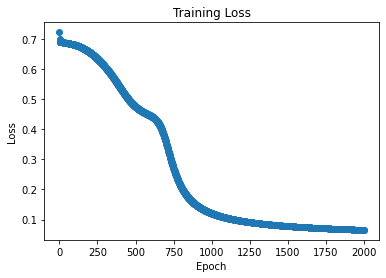

In [19]:
epochs = 2000  # run this cycle 2000 times 
epsilon = 1
initial_weights = copy.deepcopy(weights)
    
losses = []
for epoch in range(epochs):
    gradients, L = back_propagation(X, Y, weights)
    for weight_name in weights:
        weights[weight_name] -= epsilon * gradients[weight_name]
        print(weights)
    losses.append(L)
    
plt.scatter(range(epochs), losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()